In [40]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import pandas as pd

### Normalizing and extracting only non-silent parts

In [89]:
nums = [0, 1, 2, 7, 10]
speakers_ns = []

for num in nums:
    filename = 'speaker{}.wav'.format(num)
    y, sr = librosa.load(filename)
    y_normalized = ((y - np.min(y)) * 2) / (np.max(y) - np.min(y)) - 1
    intervals = librosa.effects.split(y_normalized, top_db= 10, ref= np.max)
    intervals = intervals.tolist()
    y_normalized = (y_normalized.flatten()).tolist()
    nonsilent_y = []

    for p,q in intervals :
        nonsilent_y = nonsilent_y +  y_normalized[p:q+1] 

    y_normalized = np.array(nonsilent_y)
    speakers_ns.append(y_normalized)

In [39]:
speakers_parts_ns = []

for num in nums:
    each_speaker_ns = []
    for part in range(1, 7):
        filename = 'speaker{}_part{}.wav'.format(num, part)
        y, sr = librosa.load(filename)
        y_normalized = ((y - np.min(y)) * 2) / (np.max(y) - np.min(y)) - 1
        intervals = librosa.effects.split(y_normalized, top_db= 10, ref= np.max)
        intervals = intervals.tolist()
        y_normalized = (y_normalized.flatten()).tolist()
        nonsilent_y = []

        for p,q in intervals :
            nonsilent_y = nonsilent_y +  y_normalized[p:q+1] 

        y_normalized = np.array(nonsilent_y)
        each_speaker_ns.append(y_normalized)
    speakers_parts_ns.append([each_speaker_ns])

### Chromagram for each speaker (taken nonsilent parts)

<Figure size 576x216 with 0 Axes>

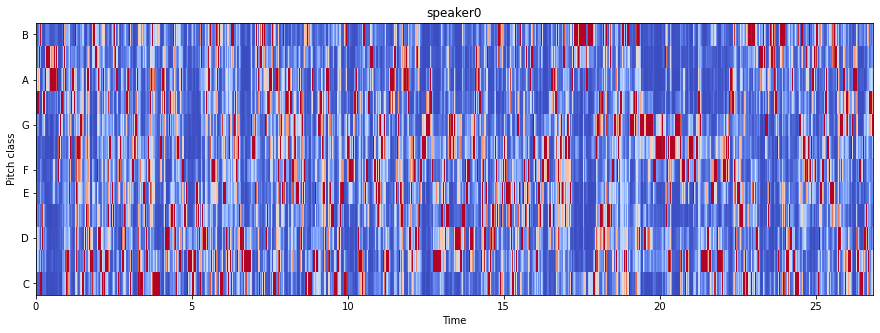

<ipython-input-31-98b3e90b34bd>:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  plt.title('speaker{}'.format(nums[speakers_ns.index(speaker)]))


<Figure size 576x216 with 0 Axes>

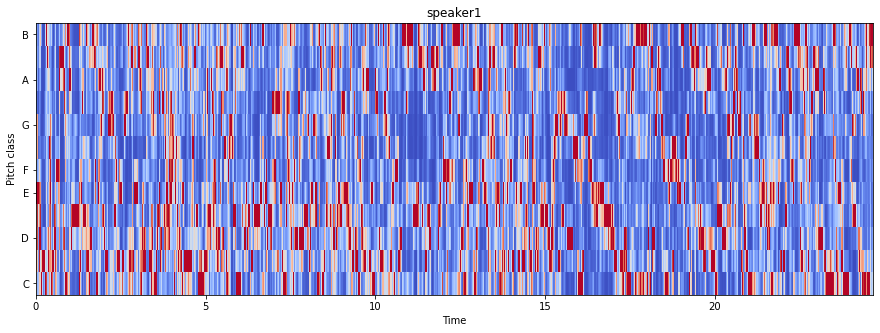

<Figure size 576x216 with 0 Axes>

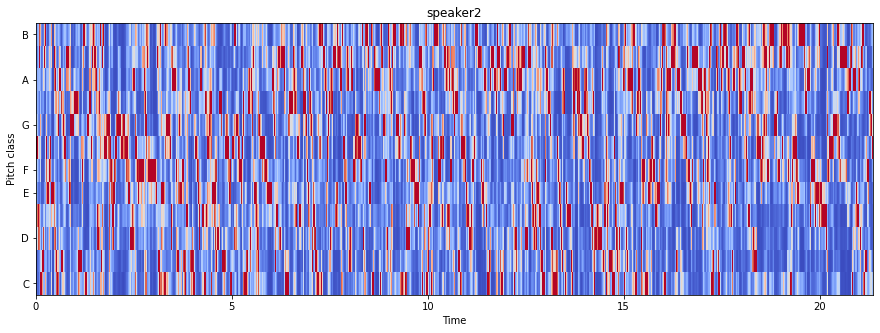

<Figure size 576x216 with 0 Axes>

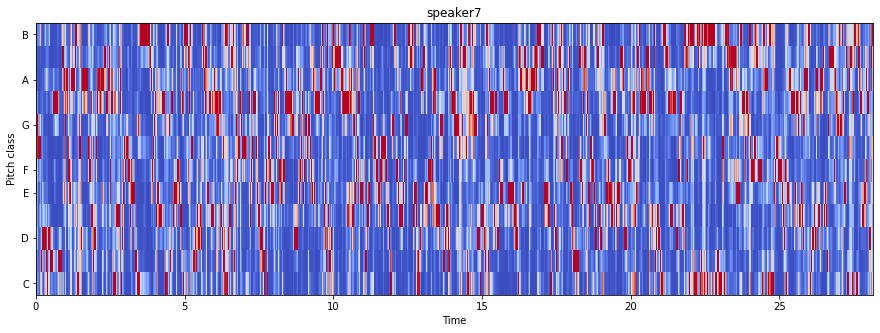

<Figure size 576x216 with 0 Axes>

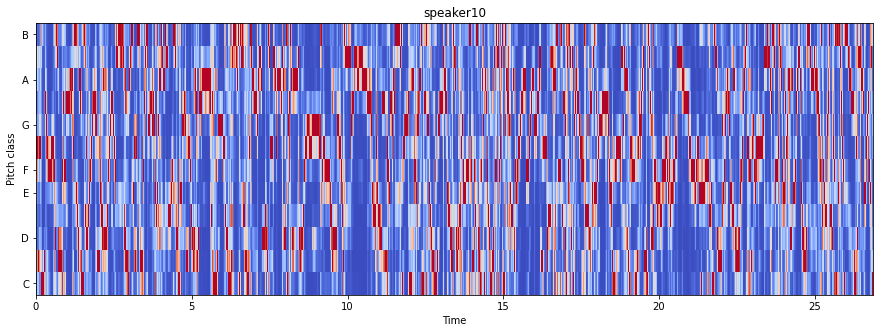

In [31]:
for speaker in speakers_ns:
    plt.figure(figsize=(8, 3))
    chromagram = librosa.feature.chroma_stft(speaker, sr=sr)
    plt.figure(figsize=(15, 5))
    librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')
    plt.title('speaker{}'.format(nums[speakers_ns.index(speaker)]))
    plt.show()

In [65]:
data = pd.DataFrame(data = {'speaker': [num for num in nums for i in range(1, 7)],
                            'part': [part for i in range(len(nums)) for part in range(1, 7)]} )

In [82]:
for arr in speakers_parts_ns:
    for speaker in arr:
        for part in speaker:
            print(np.mean(part))
        print('\n')

0.014396030017689012
-0.007878902955601907
0.016554062785509055
0.026494041653924025
0.0037392213377307765
0.02233579680696794


0.014492046141614355
0.009750706764806789
0.005948268848420058
0.017464537393531158
0.1643732711103768
0.12018993080957395


0.03078637638006917
0.06059898782022194
-0.012464011616664585
0.01181761927571852
0.016271489595108338
0.02151729955227811


0.040813567474065844
0.11303965261324096
0.009086718100224309
0.001484434578778986
0.029303780568269187
0.045251145311645674


0.054492084266644085
0.015486445679855621
-0.207287574078761
-0.0725145301954208
-0.08712294771660671
-0.19557865319902357




In [85]:
nums = [0, 1, 2, 7, 10]
speakers_ns = []

for num in nums:
    filename = 'speaker{}.wav'.format(num)
    y, sr = librosa.load(filename)
    y_normalized = y[:]
#     y_normalized = ((y - np.min(y)) * 2) / (np.max(y) - np.min(y)) - 1
    org_len = len(y_ns)
    intervals = librosa.effects.split(y_normalized, top_db= 10, ref= np.max)
    intervals = intervals.tolist()
    y_normalized = (y_normalized.flatten()).tolist()
    nonsilent_y = []

    for p,q in intervals :
        nonsilent_y = nonsilent_y +  y_normalized[p:q+1] 

    y_normalized = np.array(nonsilent_y)
    speakers_ns.append(y_normalized)

In [86]:
speakers_parts_ns = []

for num in nums:
    each_speaker_ns = []
    for part in range(1, 7):
        filename = 'speaker{}_part{}.wav'.format(num, part)
        y, sr = librosa.load(filename)
        y_normalized = y[:]
#         y_normalized = ((y - np.min(y)) * 2) / (np.max(y) - np.min(y)) - 1
        org_len = len(y_ns)
        intervals = librosa.effects.split(y_normalized, top_db= 10, ref= np.max)
        intervals = intervals.tolist()
        y_normalized = (y_normalized.flatten()).tolist()
        nonsilent_y = []

        for p,q in intervals :
            nonsilent_y = nonsilent_y +  y_normalized[p:q+1] 

        y_normalized = np.array(nonsilent_y)
        each_speaker_ns.append(y_normalized)
    speakers_parts_ns.append([each_speaker_ns])

In [88]:
for arr in speakers_parts_ns:
    for speaker in arr:
        for part in speaker:
            print(round(np.mean(part), 5))
        print('\n')

0.0001
-2e-05
-6e-05
-1e-05
-1e-05
4e-05


4e-05
-2e-05
8e-05
2e-05
9e-05
-0.00014


-9e-05
-0.00014
-0.00018
-9e-05
-0.00023
-0.00012


-2e-05
3e-05
4e-05
-3e-05
-0.0
-4e-05


5e-05
6e-05
-6e-05
-0.0
0.00011
-2e-05




In [93]:
filename = 'speaker1_part1.wav'
y, sr = librosa.load(filename)
y_ns = y[:]
#   y_normalized = ((y - np.min(y)) * 2) / (np.max(y) - np.min(y)) - 1
intervals = librosa.effects.split(y_ns, top_db= 10, ref= np.max)
intervals = intervals.tolist()
y_ns = (y_ns.flatten()).tolist()
nonsilent_y = []

for p,q in intervals :
    nonsilent_y = nonsilent_y +  y_ns[p:q+1] 

y_ns = np.array(nonsilent_y)

In [94]:
y_ns

array([-0.0011659 , -0.00233055, -0.00264362, ...,  0.02470508,
        0.05074959,  0.06439212])